# Testing new composite code
this should be used to 

In [156]:
# Read in an AGN template
# Read in all required libraries
# Import in all of the required libraries
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
# In addition also use astSED to create filters
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

# Load the filters
pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

In [158]:
# Skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

# Swire templates
swire_folderpath = os.path.join('datasets', 'Templates', 'SWIRE')

# Brown templates
brown_folderpath = os.path.join('datasets', 'Templates', 'Brown', '2014','Rest')


In [159]:
# Read in the AGN templates
type1_agn, type1_params = create_type1_skirtor_agn(skirtor_folderpath)
type2_agn, type2_params = create_type2_skirtor_agn(skirtor_folderpath)

# Read in the template set of choice
swire_templates, template_names = read_swire_templates(swire_folderpath)

# Read in the brown templates
brown_templates, brown_template_names = read_brown_galaxy_templates(brown_folderpath)


agn_model = type2_agn
agn_model_name = 'Type2AGN'

template_set  = brown_templates
template_set_name = 'GALSEDATLAS'


In [160]:
# Setup how many alpha values we want to explore
alpha_values = np.linspace(0, 1, 11)
print(alpha_values)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [161]:
composites = generate_composite_set(agn_model, template_set, alpha_values)

In [162]:
# Generate the UVJ colours
uv, vj = generate_UVJ_composite_set_colours(composites, alpha_values, pb_U, pb_V, pb_J)


0          102.010000
1          103.910000
2          104.712855
3          106.080000
4          108.060000
            ...      
2367    332163.750000
2368    333944.030000
2369    335725.440000
2370    337507.720000
2371    339291.190000
Name: lambda (Angstroms), Length: 2372, dtype: float64
0          100.070000
1          101.930000
2          104.070000
3          104.712855
4          106.000000
            ...      
2351    332670.440000
2352    334453.410000
2353    336237.560000
2354    338022.560000
2355    339808.750000
Name: lambda (Angstroms), Length: 2356, dtype: float64
0          100.090000
1          101.950000
2          104.090000
3          104.712855
4          106.020000
            ...      
2437    332735.220000
2438    334518.560000
2439    336303.030000
2440    338088.380000
2441    339874.910000
Name: lambda (Angstroms), Length: 2442, dtype: float64
0          100.090000
1          101.950000
2          104.090000
3          104.712855
4          106.020000

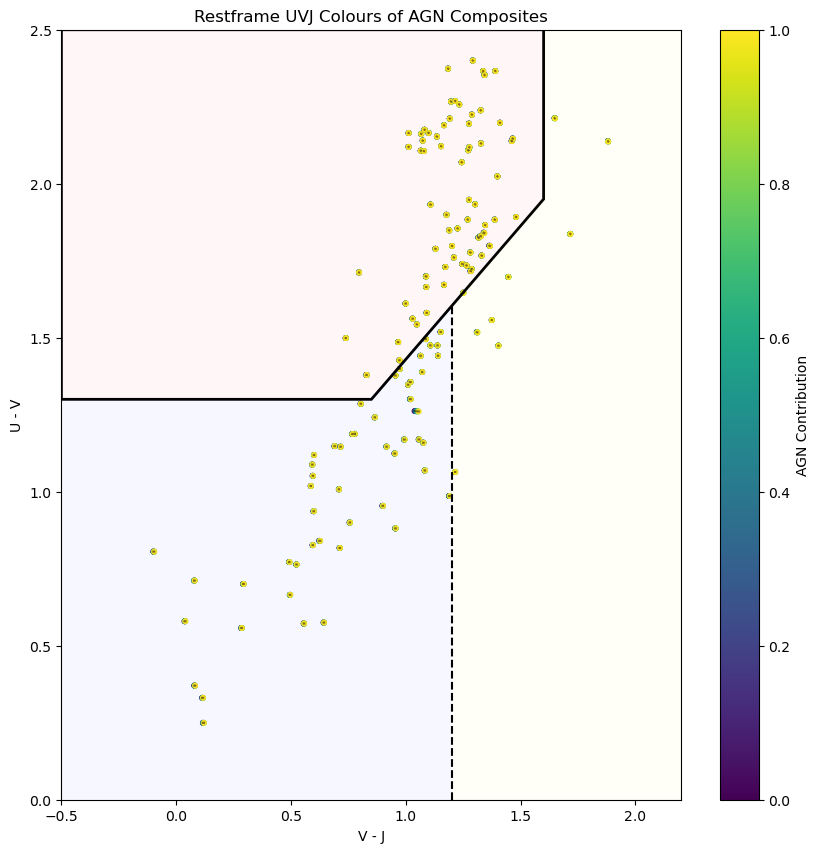

In [163]:
uv_cols = []
vj_cols = []

plt.figure(figsize=(10, 10))
for i in range(len(composites[0])):
    # Plot for this particular composite i, all of the associated alpha values
    for j in range(len(alpha_values)):
        # where uv[i][j] is the U - V colour of the ith composite, with the jth alpha value
        # and vj[i][j] is the V - J colour of the ith composite, with the jth alpha value

        
        # add all of the composites into a list
        uv_cols.append(uv[j][i])
        vj_cols.append(vj[j][i])
        
        # Plot a connecting line
        #if j != 0:
            #plt.plot([vj[i][j-1], vj[i][j]], [uv[i][j-1], uv[i][j]], color='black', alpha=alpha_values[j])
    plt.scatter(vj_cols, uv_cols, c=alpha_values, s=10)
    plt.plot(vj_cols, uv_cols, color='black', alpha=0.5)
    uv_cols = []
    vj_cols = []
    # Plotting a connecting line only between the first and last point of a particular composite
    
    
plt.colorbar().set_label('AGN Contribution')
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
#plt.colorbar().set_label('AGN Contribution')
    
    # Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


plt.show()



0          102.010000
1          103.910000
2          104.712855
3          106.080000
4          108.060000
            ...      
2367    332163.750000
2368    333944.030000
2369    335725.440000
2370    337507.720000
2371    339291.190000
Name: lambda (Angstroms), Length: 2372, dtype: float64
0          100.070000
1          101.930000
2          104.070000
3          104.712855
4          106.000000
            ...      
2351    332670.440000
2352    334453.410000
2353    336237.560000
2354    338022.560000
2355    339808.750000
Name: lambda (Angstroms), Length: 2356, dtype: float64
0          100.090000
1          101.950000
2          104.090000
3          104.712855
4          106.020000
            ...      
2437    332735.220000
2438    334518.560000
2439    336303.030000
2440    338088.380000
2441    339874.910000
Name: lambda (Angstroms), Length: 2442, dtype: float64
0          100.090000
1          101.950000
2          104.090000
3          104.712855
4          106.020000

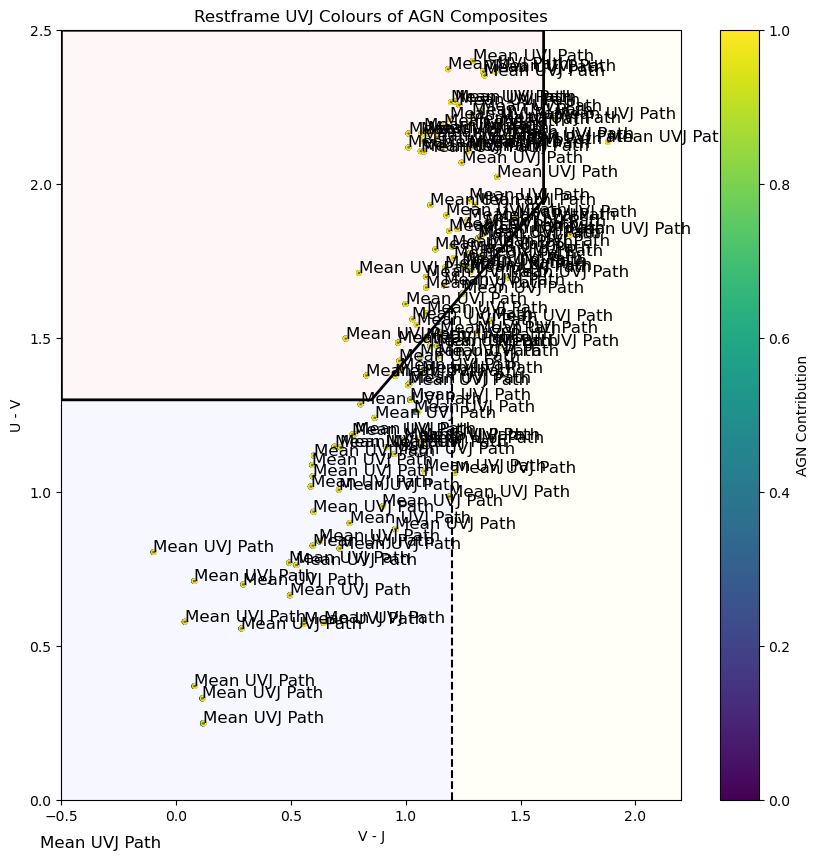

([[1.9332546556799564,
   1.0078423388314803,
   0.9542235209347893,
   2.138990032726774,
   1.1694687505917045,
   1.7298366320461867,
   0.5574001893251026,
   1.0690176642550888,
   1.9323662887167998,
   1.5187016377932139,
   2.3737889130556695,
   1.7988243062512304,
   1.7769485751746075,
   1.6992477314356336,
   0.840509382294222,
   1.2619374050485916,
   1.8411470572286284,
   1.8255684683477824,
   0.7114063604459879,
   0.3307977116144869,
   0.5794505109835946,
   1.8299451440003338,
   0.8174356812021912,
   1.0880841582224967,
   2.1197831514521965,
   1.7888500771818734,
   2.2117471535330253,
   1.7119145593446703,
   2.1381283425661586,
   1.3561887743338374,
   2.2245636616188804,
   1.4988095553112402,
   1.6461842252021839,
   1.7668446187855373,
   1.4268633132910722,
   1.1696666216318192,
   2.2132291559059993,
   1.1190195873467808,
   1.1479470579342177,
   1.4857590619117715,
   1.739823653033202,
   1.1880036782369707,
   1.5575148399677907,
   2.198140772

In [164]:
# Use the quickplotting tool to plot the UVJ diagram <- This tool can be useful for quickplotting of composites in UVJ space.
plot_uvj_composite_set(composites, template_names ,alpha_values, pb_U, pb_V, pb_J, path=True)

0          102.010000
1          103.910000
2          104.712855
3          106.080000
4          108.060000
            ...      
2367    332163.750000
2368    333944.030000
2369    335725.440000
2370    337507.720000
2371    339291.190000
Name: lambda (Angstroms), Length: 2372, dtype: float64
0          100.070000
1          101.930000
2          104.070000
3          104.712855
4          106.000000
            ...      
2351    332670.440000
2352    334453.410000
2353    336237.560000
2354    338022.560000
2355    339808.750000
Name: lambda (Angstroms), Length: 2356, dtype: float64
0          100.090000
1          101.950000
2          104.090000
3          104.712855
4          106.020000
            ...      
2437    332735.220000
2438    334518.560000
2439    336303.030000
2440    338088.380000
2441    339874.910000
Name: lambda (Angstroms), Length: 2442, dtype: float64
0          100.090000
1          101.950000
2          104.090000
3          104.712855
4          106.020000

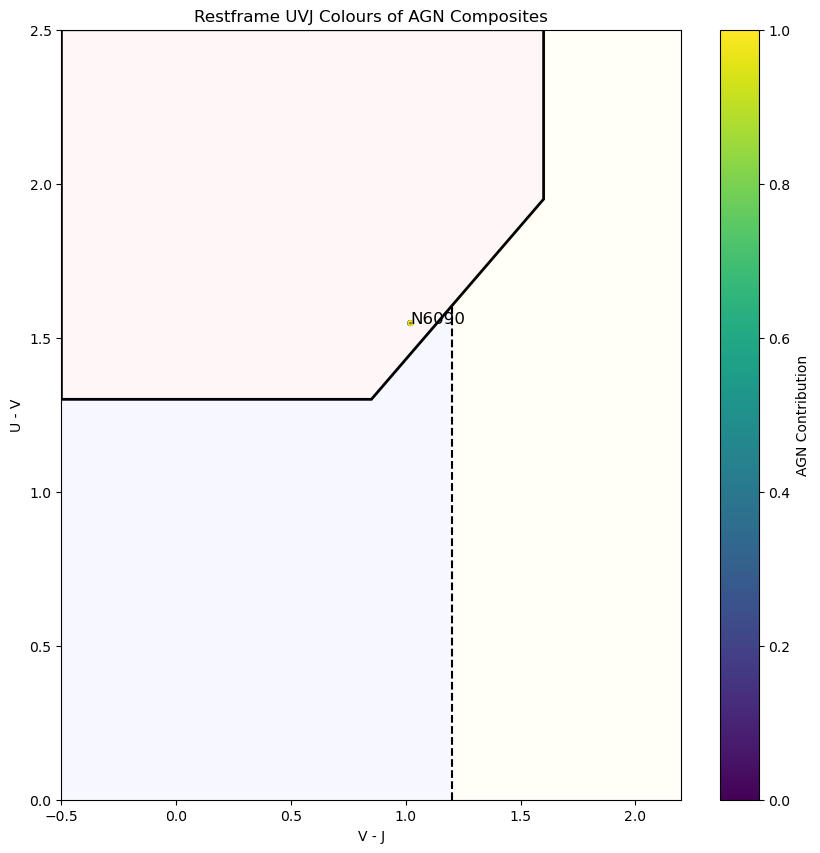

In [165]:
plot_mean_uvj_composite_set(composites, template_names ,alpha_values, pb_U, pb_V, pb_J, path=True)

In [166]:
# We would now like to do a similar analysis using type 1 or type 2 rest frame colours, ensuring a versatile output.


composites


[[      lambda (Angstroms)  Total Flux (erg/s/cm^2/Angstrom)
  0             102.010000                      1.625613e-07
  1             103.910000                      2.133303e-07
  2             104.712855                      2.394111e-07
  3             106.080000                      2.838230e-07
  4             108.060000                      3.854727e-07
  ...                  ...                               ...
  2367       332163.750000                      5.887993e-02
  2368       333944.030000                      7.821389e-02
  2369       335725.440000                      7.740889e-02
  2370       337507.720000                      5.748144e-02
  2371       339291.190000                      5.729883e-02
  
  [2372 rows x 2 columns],
        lambda (Angstroms)  Total Flux (erg/s/cm^2/Angstrom)
  0             100.070000                      1.931181e-08
  1             101.930000                      2.510761e-08
  2             104.070000                      2.97726

In [167]:

# # This is the length of an SED
# print('Length of each SED: ' + str(len(composites[0][0])))

# # This is the length of the amount of composites
# print('Length of amount of composites: ' + str(len(composites[0])))

# # This is the length of the amount of alpha values
# print('Length of amount of alpha values: ' + str(len(composites)))




0
1
2
3
4
5
6
7
8
9
10


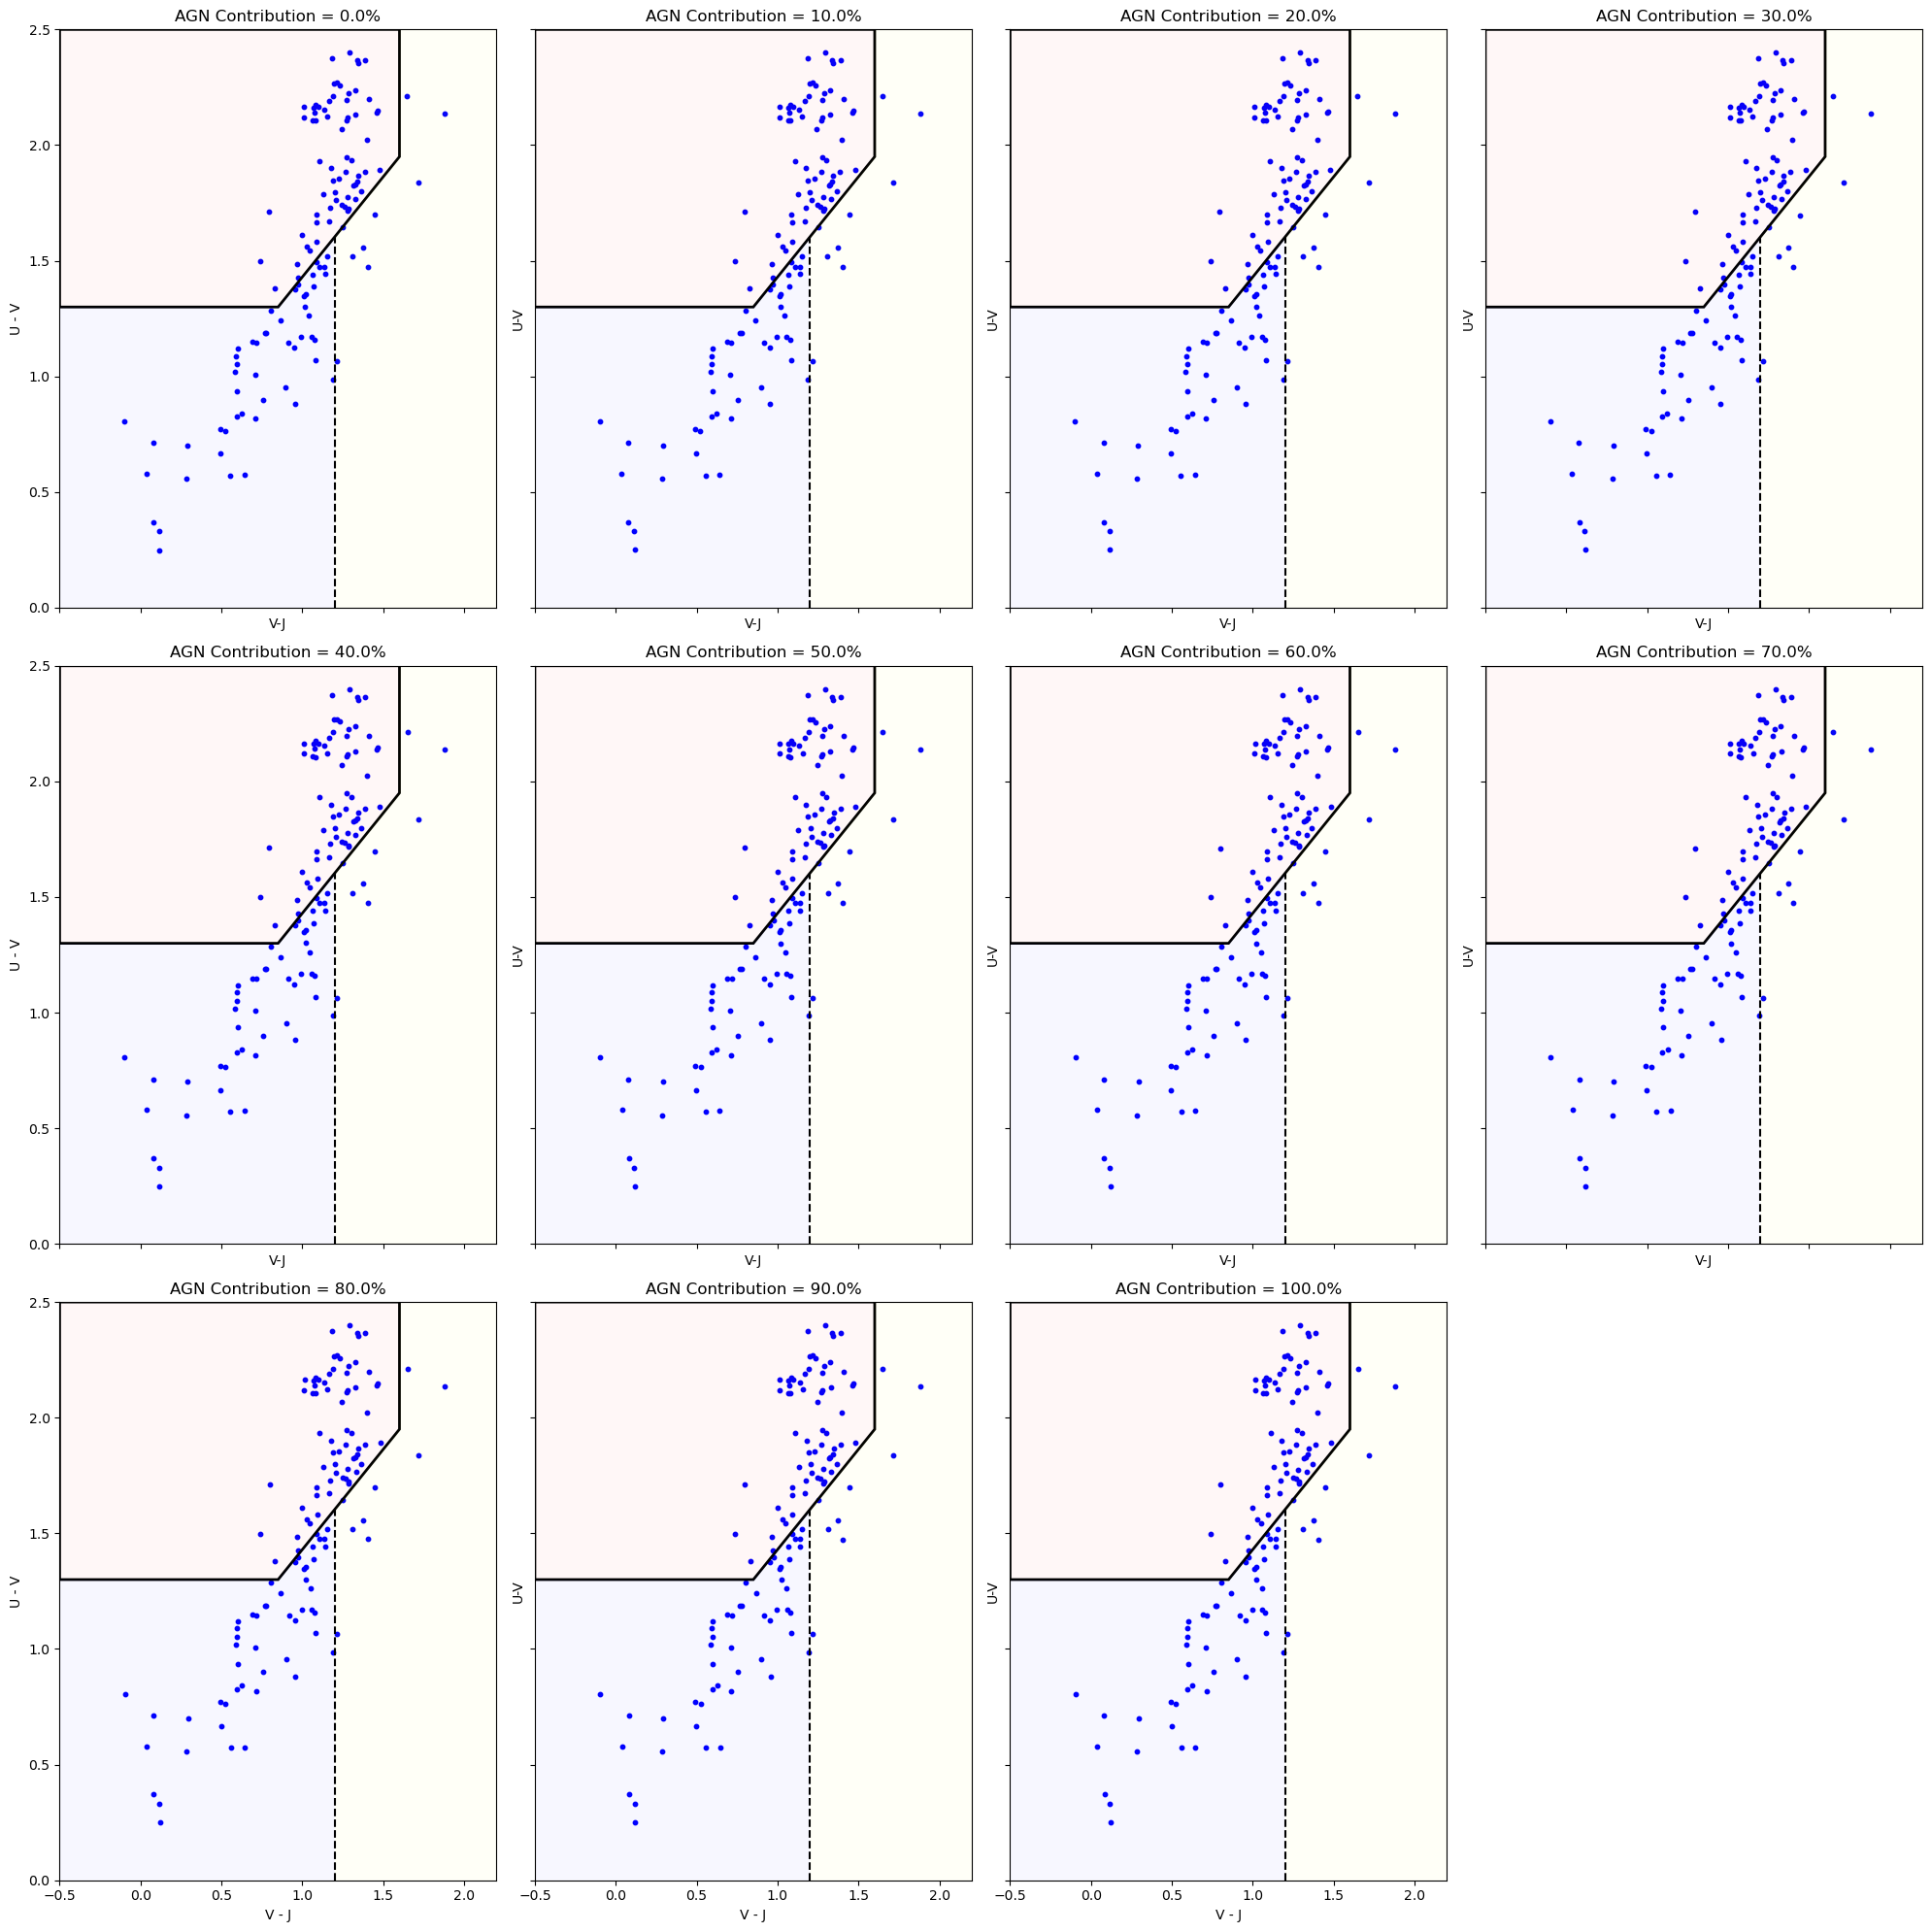

In [168]:
# For the amonut of alpha values, we want to loop through and plot a UVJ diagram for each of the composites

# We want to plot the UVJ diagram for each of the composites


fig, axs = plt.subplots(3, 4, figsize=(20, 20), sharex=True, sharey=True)
list_of_alpha_indices = np.linspace(0, 1, 11)

alpha = np.linspace(0, 1, 11)

for n in range(len(list_of_alpha_indices)):
    print(n)
    # Plot the UGR diagram for the SED templates at different redshifts
    
    
    axs[n//4, n%4].scatter(vj[n], uv[n], c='blue', s=10)
    
    
    axs[n//4, n%4].set_ylabel("U-V")
    axs[n//4, n%4].set_xlabel("V-J")
    axs[n//4, n%4].set_title(f"AGN Contribution = {round(alpha[n], 1)*100}%")
    
    # add the alpha value information onto the plot somewhere
    #axs[n//4, n%4].text(0.5, 0.9, f"alpha = {round(alpha[n], 2)}", horizontalalignment='center', verticalalignment='center', transform=axs[n//4, n%4].transAxes)

    # Additionally we can plot the UGR selection criteria on the UGR diagram
    # U_rule = [[1.2,9], [1.2,2.2], [0.6,1.6], [-3,1.6], [-3,9]]
    # axs[n//4, n%4].add_patch(plt.Polygon(U_rule, closed=True, fill=True, facecolor=(1,0,0,0.05), edgecolor=(0,0,0,1), linewidth=2, linestyle='solid')) # This looks like the correct U dropout technique

    axs[n//4, n%4].set_xlim(-0.5, 2.2)
    axs[n//4, n%4].set_ylim(0, 2.5)
    
    # Define paths for selections
    path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
    path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
    path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]
    
    # Add patches for selections
    axs[n//4, n%4].add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
    axs[n//4, n%4].add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
    axs[n//4, n%4].add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))
    
    # Add vertical line
    axs[n//4, n%4].axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
    
    # Add axis labels
    if n//4 == 2:
        axs[n//4, n%4].set_xlabel("V - J")
    if n%4 == 0:
        axs[n//4, n%4].set_ylabel("U - V")
        
    
# Remove final plot
fig.delaxes(axs[2, 3])

# # Make all the plots touch
# plt.subplots_adjust(wspace=-0.5, hspace=0)

plt.tight_layout()    

# Save the output
plt.savefig(f'outputs/UVJPlots/UVJ_evolution_{agn_model_name}_{template_set_name}.png')


# Plot
plt.show()
